In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 
#import mpld3
#mpld3.enable_notebook()

from scipy import optimize

import sys
sys.path.append('../python/')
from EdwRes import *

In [12]:
E_recoil = np.array([15, 25, 35, 45, 55, 100])
sig_NR = np.array([0.06, 0.05, 0.025, 0.01, 0.014, 0.01])
sig_NR_err = 0.1*sig_NR

Text(0, 0.5, '1-sigma width of NR band')

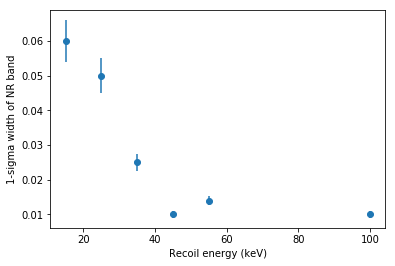

In [13]:
plt.errorbar(E_recoil, sig_NR, yerr=sig_NR_err, fmt="o")
plt.xlabel("Recoil energy (keV)")
plt.ylabel("1-sigma width of NR band")


Text(0, 0.5, '1-sigma width of NR band')

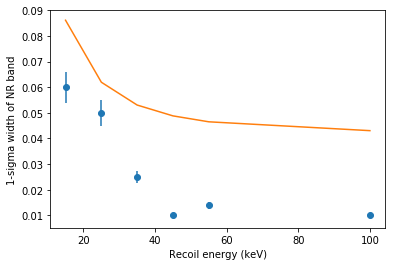

In [14]:
ion_center_0keV = 1.3
ion_guard_0keV = 1.5
heat_0keV = 0.4
ion_122keV = 3.1 #3.3 #3.1
heat_122keV = 2.7
aH = 0.0157
V = 4

# get_sig_nuc_func_fit(FWHM_center, FWHM_guard, FWHM122_ion, FWHM0_heat, FWHM122_heat, V, aH=None, C = None)
#sig_nr_GGA3 = get_sig_nuc_func(ion_center_0keV, ion_guard_0keV, ion_122keV, heat_0keV, heat_122keV, V, aH)
sig_nr_func = get_sig_nuc_func(ion_center_0keV, ion_guard_0keV, ion_122keV, heat_0keV, heat_122keV, V, aH, C=0.04)

plt.errorbar(E_recoil, sig_NR, yerr=sig_NR_err, fmt="o")
plt.plot(E_recoil, sig_nr_func(E_recoil))

plt.xlabel("Recoil energy (keV)")
plt.ylabel("1-sigma width of NR band")

In [15]:
def fit_func(E_keV_arr, par0):
    fit_func = get_sig_nuc_func(ion_center_0keV, ion_guard_0keV, ion_122keV, heat_0keV, heat_122keV, V, aH, C=0.04)
    
    return fit_func(E_keV_arr)

In [16]:
params, params_cov = optimize.curve_fit(fit_func, E_recoil, sig_NR, p0=[0.04])

In [17]:
print(params, params_cov)

[0.04] [[inf]]
